In [1]:
import os
import torch
import torch.utils.data as Data
import torch.nn as nn
import torchvision
import numpy 
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(1)

In [3]:
#hyper parameters
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = False

In [4]:
#mnist digits dataset
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    DOWNLOAD_MNIST = True

In [5]:
train_data = torchvision.datasets.MNIST(
    root = './mnist/',
    train =True,
    transform = torchvision.transforms.ToTensor(),
    download = DOWNLOAD_MNIST,
)

100%|██████████████████████████████████████████████████████████████████▊| 9887744/9912422 [00:10<00:00, 1184330.09it/s]

Extracting ./mnist/MNIST\raw\train-images-idx3-ubyte.gz to ./mnist/MNIST\raw



0it [00:00, ?it/s]
 85%|██████████████████████████████████████████████████████████████           | 24576/28881 [00:02<00:00, 12385.09it/s]
32768it [00:04, 8750.94it/s]                                                                                           


Extracting ./mnist/MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist/MNIST\raw



0it [00:00, ?it/s]
 97%|██████████████████████████████████████████████████████████████████▏ | 1605632/1648877 [00:03<00:00, 690460.55it/s]
1654784it [00:03, 479220.35it/s]                                                                                       

Extracting ./mnist/MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist/MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                         | 0/4542 [00:01<?, ?it/s]
8192it [00:01, 5344.04it/s]                                                                                            

Extracting ./mnist/MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist/MNIST\raw
Processing...
Done!


9920512it [00:30, 1184330.09it/s]                                                                                      

torch.Size([60000, 28, 28])
torch.Size([60000])


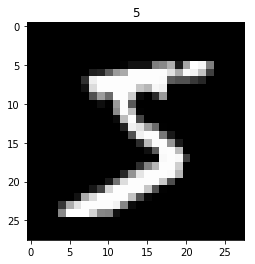

In [14]:
#plot one example
print(train_data.data.size())   #(60000,28,28)
print(train_data.targets.size()) #(60000)
plt.imshow(train_data.data[0].numpy(),cmap='gray')
plt.title('%i'% train_data.targets[0])
plt.show()

In [10]:
train_loader = Data.DataLoader(dataset = train_data,batch_size = BATCH_SIZE,shuffle=True)


In [13]:
test_data = torchvision.datasets.MNIST(root='./mnist/',train=False)
test_x = torch.unsqueeze(test_data.data,dim=1).type(torch.FloatTensor)[:2000]/255
test_y = test_data.targets[:2000]

In [20]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1,16,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.out = nn.Linear(32*7*7,10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0),-1)
        output = self.out(x)
        return output,x

In [21]:
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(),lr=LR)
loss_func = nn.CrossEntropyLoss()

In [25]:
for epoch in range(EPOCH):
    for step,(b_x,b_y) in enumerate(train_loader):
        output = cnn(b_x)[0]
        loss  =loss_func(output,b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%50 == 0:
            test_output,last_layer = cnn(test_x)
            pred_y = torch.max(test_output,1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum())/float(test_y.size(0))
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 2.3167 | test accuracy: 0.14
Epoch:  0 | train loss: 0.5067 | test accuracy: 0.79
Epoch:  0 | train loss: 0.3850 | test accuracy: 0.89
Epoch:  0 | train loss: 0.1797 | test accuracy: 0.90
Epoch:  0 | train loss: 0.1353 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1600 | test accuracy: 0.93
Epoch:  0 | train loss: 0.1367 | test accuracy: 0.94
Epoch:  0 | train loss: 0.3366 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0875 | test accuracy: 0.96
Epoch:  0 | train loss: 0.2084 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0623 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0539 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0323 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0344 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1099 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0815 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0605 | test accuracy: 0.98
Epoch:  0 | train loss: 0.1889 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0178 | test accuracy

In [26]:
pred_y

array([7, 2, 1, ..., 3, 9, 5], dtype=int64)